In [ ]:
df=df[:5]
from transformers import pipeline

caption = pipeline('image-to-text')

In [ ]:
caption = pipeline('image-to-text')


In [ ]:
! pip install transformers -q


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 35.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 45.7 MB/s eta 0:00:00


In [ ]:
def generate_caption(filename):
    # Your code to generate caption goes here
    caption = pipeline('image-to-text')
    caption = caption(filename)
    

In [ ]:
import wget
import requests
import pandas as pd

valid_rows = []

for index, row in df.iterrows():
    image_url = row['image_url']
    
    # Check if URL is valid
    response = requests.head(image_url)
    if response.status_code != 200:
        print(f"Invalid URL: {image_url}")
        continue

    # Check if image exists
    content_type = response.headers.get('Content-Type')
    if 'image' not in content_type:
        print(f"Invalid image URL: {image_url}")
        continue
        
    # Append row to valid_rows
    valid_rows.append(row)

    # Download image
    filename = wget.download(image_url)
    caption = generate_caption(filename)
    print( caption)
    row['model_caption'] = caption
    

   

    # Append row to valid_rows
    valid_rows.append(row)

    print(f"Downloaded image: {image_url}")
    
# Create new DataFrame with valid rows
valid_df = pd.DataFrame(valid_rows)

# Save new DataFrame to CSV file
valid_df.to_csv('valid_image_urls.csv', index=False)

In [ ]:
pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9676 sha256=c3754b0d90c1896e9b93b3efb8ec99b0cee8bd5b226e82705ff8a30032f94a0e
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [ ]:
from PIL import Image

from transformers import pipeline

"""# Image Captioning"""

#load image caption pipeline
caption = pipeline('image-to-text')
  
# open method used to open different extension image file



No model was supplied, defaulted to ydshieh/vit-gpt2-coco-en and revision 65636df (https://huggingface.co/ydshieh/vit-gpt2-coco-en).
Using a pipeline without specifying a model name and revision in production is not recommended.


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [ ]:
import pandas as pd
import csv
import requests
import pandas as pd
import wget

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/train_clean.csv')
df=df[:5000]

# Install transformers library
! pip install transformers -q

# Load image captioning pipeline
caption = pipeline('image-to-text')

# Loop through all rows in the dataframe
captions = []
for index, row in df.iterrows():
    # Get the image URL and clean caption for the current row
    image_url = row['image_url']
    clean_caption = row['clean_title']
    towway_label= row['2_way_label']
    
    if pd.isna(image_url):
        print(f"Invalid image URL: {image_url}")
        continue
    
    # Make a HEAD request to the URL to check if it exists
    try:
        response = requests.head(image_url)
        if response.status_code != 200:
            print(f"Invalid image URL: {image_url}")
            continue
    except:
        print(f"Error making request to URL: {image_url}")
        continue
    # Download the image file
    response = requests.head(image_url)
    filename = wget.download(image_url)
    
    # Generate the image caption
    caption_text = caption(filename)[0]['generated_text']
    print(caption_text)
    
    # Store the image URL, clean caption, and generated caption in a list
    captions.append({
        'image_url': image_url,
        'clean_caption': clean_caption,
        'generated_caption': caption_text,
        '2_way_label': towway_label
    })

# Convert the list of captions to a dataframe
captions_df = pd.DataFrame(captions)

# Save the dataframe to a CSV file
captions_df.to_csv('captions.csv', index=False)

In [ ]:
captions_df.to_csv('captions.csv', index=False)

In [ ]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install tensorflow tensorflow-text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 47.1 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

# Read CSV file
data = pd.read_csv('/content/drive/MyDrive/captions.csv')

# Load the Universal Sentence Encoder
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

# Embed the sentences
sent1_vecs = embed(data['clean_caption']).numpy()
sent2_vecs = embed(data['generated_caption']).numpy()

# Calculate cosine similarity between sentences
def cosine_similarity(sent1, sent2):
    return np.dot(sent1, sent2) / (np.linalg.norm(sent1) * np.linalg.norm(sent2))

sim_scores = [cosine_similarity(sent1, sent2) for sent1, sent2 in zip(sent1_vecs, sent2_vecs)]

# Prepare input and output arrays
X = []
y = data['2_way_label'].values

for i, row in data.iterrows():
    sent1 = sent1_vecs[i]
    sent2 = sent2_vecs[i]
    similarity = sim_scores[i]
    X.append(sent2)

X = np.array(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train classification model
model = Sequential()
model.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Use early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])


Epoch 1/100
120/120 [==============================] - 6s 8ms/step - loss: 0.9568 - accuracy: 0.5261 - val_loss: 0.7000 - val_accuracy: 0.5454
Epoch 2/100
120/120 [==============================] - 1s 8ms/step - loss: 0.8537 - accuracy: 0.5284 - val_loss: 0.6910 - val_accuracy: 0.5474
Epoch 3/100
120/120 [==============================] - 1s 8ms/step - loss: 0.7719 - accuracy: 0.5423 - val_loss: 0.6693 - val_accuracy: 0.5860
Epoch 4/100
120/120 [==============================] - 1s 8ms/step - loss: 0.7361 - accuracy: 0.5506 - val_loss: 0.6594 - val_accuracy: 0.6027
Epoch 5/100
120/120 [==============================] - 1s 7ms/step - loss: 0.7120 - accuracy: 0.5639 - val_loss: 0.6538 - val_accuracy: 0.6038
Epoch 6/100
120/120 [==============================] - 1s 6ms/step - loss: 0.6949 - accuracy: 0.5608 - val_loss: 0.6480 - val_accuracy: 0.6194
Epoch 7/100
120/120 [==============================] - 1s 6ms/step - loss: 0.6849 - accuracy: 0.5756 - val_loss: 0.6477 - val_accuracy: 0.6152

In [4]:
loss, accuracy = model.evaluate(X_test, y_test)

print("Loss:", loss)
print("Accuracy:", accuracy)


30/30 [==============================] - 0s 4ms/step - loss: 0.6408 - accuracy: 0.6465
Loss: 0.6407595276832581
Accuracy: 0.6465067863464355


In [7]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import scikitplot as skplt
import matplotlib.pyplot as plt
# Get the model's predictions on the test set
y_pred = model.predict(X_test)

# Convert the predictions to binary labels (0 or 1)
y_pred_labels = (y_pred > 0.5).astype(int).flatten()

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred_labels)
recall = recall_score(y_test, y_pred_labels)
f1 = f1_score(y_test, y_pred_labels)

# Print the metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_labels)
print("Confusion Matrix:\n", conf_matrix)

30/30 [==============================] - 0s 3ms/step
Precision: 0.6381381381381381
Recall: 0.8126195028680688
F1-score: 0.7148864592094196
Confusion Matrix:
 [[195 241]
 [ 98 425]]


In [6]:
!pip install scikit-plot
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


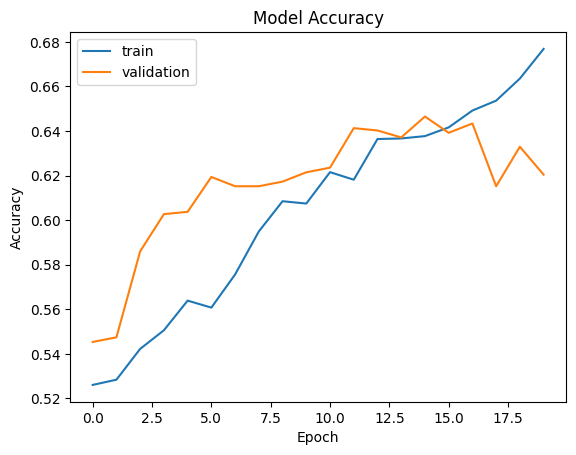

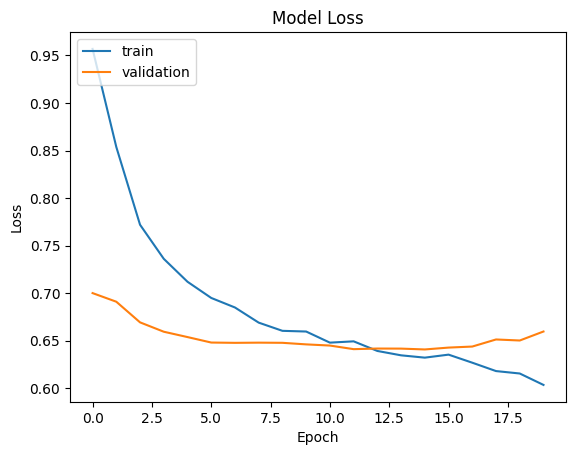

30/30 [==============================] - 0s 3ms/step


In [8]:
from sklearn.metrics import roc_curve, auc, confusion_matrix

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Plot train and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Generate ROC curve and AUC
y_pred_proba = model.predict(X_test)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

In [9]:
y_pred_proba = model.predict(X_test)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

30/30 [==============================] - 0s 3ms/step


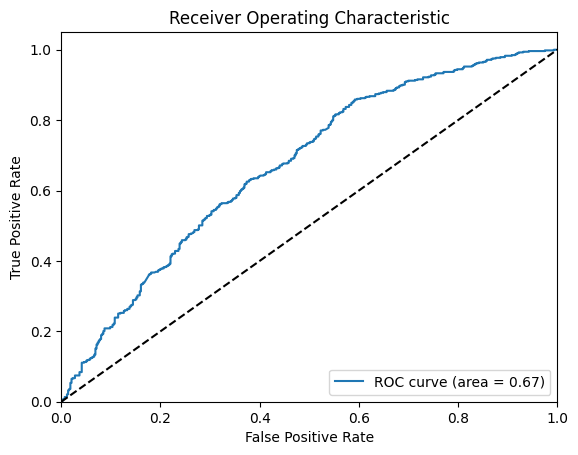

In [10]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [11]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Get the model's predictions on the test set
y_pred = model.predict(X_test)

# Convert the predictions to binary labels (0 or 1)
y_pred_labels = (y_pred > 0.5).astype(int).flatten()

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred_labels)
recall = recall_score(y_test, y_pred_labels)
f1 = f1_score(y_test, y_pred_labels)

# Print the metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_labels)
print("Confusion Matrix:\n", conf_matrix)

30/30 [==============================] - 0s 5ms/step
Precision: 0.6381381381381381
Recall: 0.8126195028680688
F1-score: 0.7148864592094196
Confusion Matrix:
 [[195 241]
 [ 98 425]]


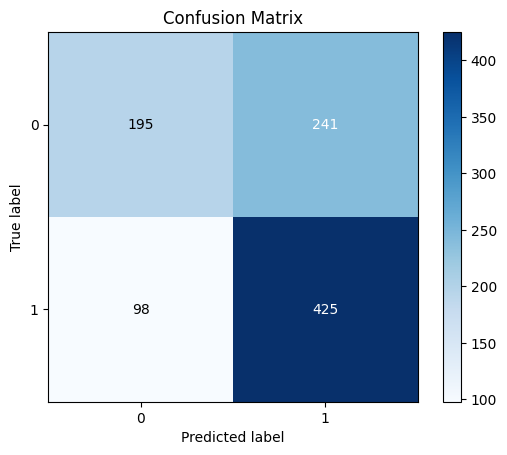

In [12]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred_labels, normalize=False, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

mlp

In [13]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split, GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

# Function to create an MLP model with a variable number of hidden layers and neurons
def create_mlp_model(hidden_layers=1, neurons_per_layer=256):
    model = Sequential()
    model.add(Dense(neurons_per_layer, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(0.5))

    for _ in range(hidden_layers - 1):
        model.add(Dense(neurons_per_layer, activation='relu'))
        model.add(Dropout(0.5))

    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Read CSV file
data = pd.read_csv('/content/drive/MyDrive/captions.csv')

# Load the Universal Sentence Encoder
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

# Embed the sentences
sent1_vecs = embed(data['clean_caption']).numpy()
sent2_vecs = embed(data['generated_caption']).numpy()

# Calculate cosine similarity between sentences
def cosine_similarity(sent1, sent2):
    return np.dot(sent1, sent2) / (np.linalg.norm(sent1) * np.linalg.norm(sent2))

sim_scores = [cosine_similarity(sent1, sent2) for sent1, sent2 in zip(sent1_vecs, sent2_vecs)]

# Prepare input and output arrays
X = []
y = data['2_way_label'].values

for i, row in data.iterrows():
    sent1 = sent1_vecs[i]
    sent2 = sent2_vecs[i]
    similarity = sim_scores[i]
    X.append(sent2)

X = np.array(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Grid search parameters
param_grid = {
    'hidden_layers': [1, 2, 3],
    'neurons_per_layer': [128, 256, 512]
}

# Create KerasClassifier with the create_mlp_model function
model = KerasClassifier(build_fn=create_mlp_model, epochs=100, batch_size=32, verbose=0)

# Perform grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train, y_train)

# Print the best parameters
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Evaluate the best model on the test set
best_model = grid_result.best_estimator_.model
best_model.evaluate(X_test, y_test)



<ipython-input-13-fca46d12cf8a>:62: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_mlp_model, epochs=100, batch_size=32, verbose=0)


Best: 0.587115 using {'hidden_layers': 3, 'neurons_per_layer': 128}
30/30 [==============================] - 0s 2ms/step - loss: 1.9260 - accuracy: 0.5850


[1.925995945930481, 0.5849843621253967]

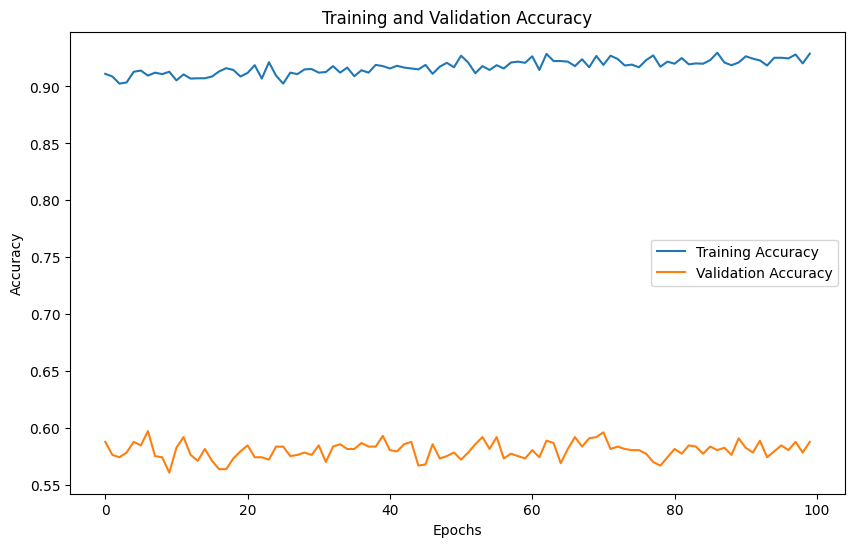

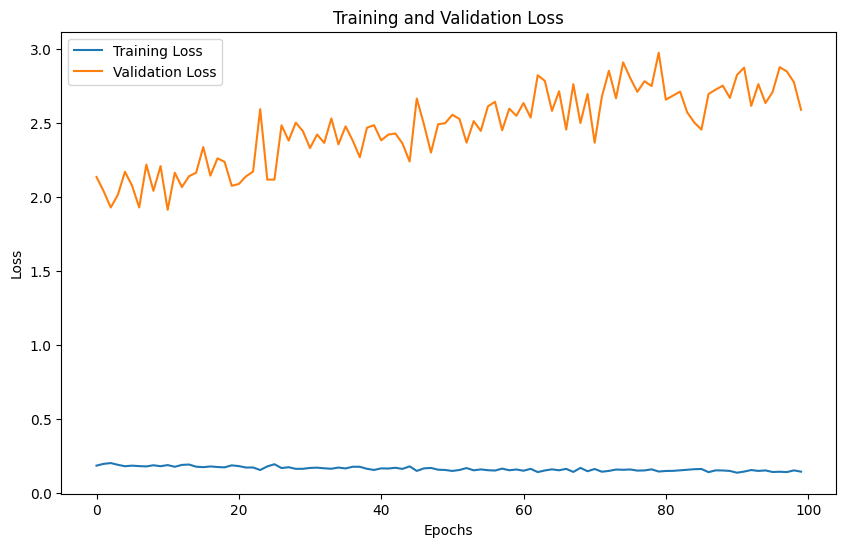

30/30 [==============================] - 0s 2ms/step


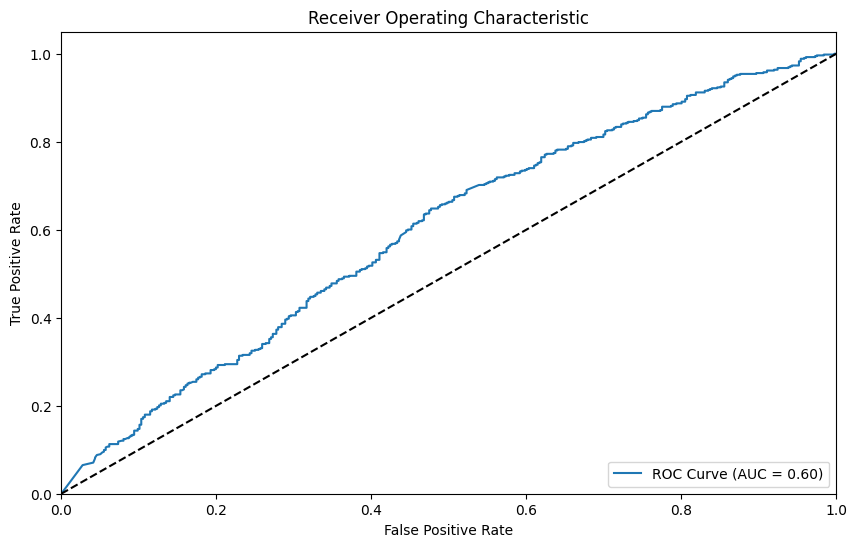

In [14]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
history = best_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=0)
import scikitplot as skplt
import matplotlib.pyplot as plt
# Plot training accuracy and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot training loss and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Generate predictions
y_pred_prob = best_model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


In [15]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Get the model's predictions on the test set
y_pred = best_model.predict(X_test)

# Convert the predictions to binary labels (0 or 1)
y_pred_labels = (y_pred > 0.5).astype(int).flatten()

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred_labels)
recall = recall_score(y_test, y_pred_labels)
f1 = f1_score(y_test, y_pred_labels)

# Print the metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_labels)
print("Confusion Matrix:\n", conf_matrix)

30/30 [==============================] - 0s 2ms/step
Precision: 0.6126760563380281
Recall: 0.6653919694072657
F1-score: 0.6379468377635197
Confusion Matrix:
 [[216 220]
 [175 348]]


In [17]:
!unzip "/content/drive/MyDrive/AAAI_dataset.zip" -d "/content/Untitled Folder"

Streaming output truncated to the last 5000 lines.
  inflating: /content/Untitled Folder/AAAI_dataset/Images/gossip_train/uClBURYlMYj54Ypo3FlwPybinVXzCGvB.jpg  
  inflating: /content/Untitled Folder/AAAI_dataset/Images/gossip_train/uhKAwn5kjrmvJEQAzz31ccZAy82cIxLy.jpg  
  inflating: /content/Untitled Folder/AAAI_dataset/Images/gossip_train/vDOyfWqqcukj4UAdCTrEelQJXkCMvl1C.jpg  
  inflating: /content/Untitled Folder/AAAI_dataset/Images/gossip_train/wjO5q13PyK5C2ouZ1HqYgtPcGLNVBPT5.jpg  
  inflating: /content/Untitled Folder/AAAI_dataset/Images/gossip_train/xij0JoaJcSAbW1Xkqcm2r9OvKoT9AduF.jpg  
  inflating: /content/Untitled Folder/AAAI_dataset/Images/gossip_train/yBBlBpYV2EkjJfsnwep2zlEdvBZ4MrcW.jpg  
  inflating: /content/Untitled Folder/AAAI_dataset/Images/gossip_train/yGVPoGKieFsmONDhXW0md55lK2EmFRyk.jpg  
  inflating: /content/Untitled Folder/AAAI_dataset/Images/gossip_train/yxHMECdHocPknf7q5h1xjSkXOp74eu8I.jpg  
  inflating: /content/Untitled Folder/AAAI_dataset/Images/gossip_trai

30/30 [==============================] - 0s 2ms/step


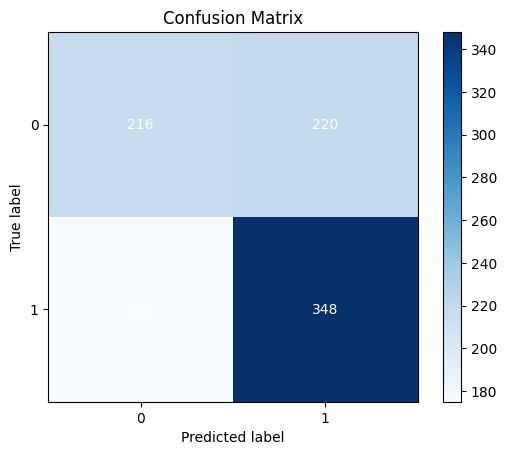

In [18]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Get the model's predictions on the test set
y_pred = best_model.predict(X_test)

# Convert the predictions to binary labels (0 or 1)
y_pred_labels = (y_pred > 0.5).astype(int).flatten()
skplt.metrics.plot_confusion_matrix(y_test, y_pred_labels, normalize=False, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional
from sklearn.model_selection import train_test_split

# Read CSV file
data = pd.read_csv('/content/drive/MyDrive/captions.csv')

# Load the Universal Sentence Encoder
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

# Embed the sentences
sent2_vecs = embed(data['generated_caption']).numpy()

# Prepare input and output arrays
X_sent2 = np.array(sent2_vecs)

# Reshape X for LSTM input (samples, timesteps, features)
X = X_sent2.reshape(X_sent2.shape[0], 1, X_sent2.shape[1])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, data['2_way_label'].values, test_size=0.2, random_state=42)

# Define and train classification model
model = Sequential()
model.add(Bidirectional(LSTM(128, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/100
120/120 [==============================] - 14s 47ms/step - loss: 0.6832 - accuracy: 0.5616 - val_loss: 0.6591 - val_accuracy: 0.6246
Epoch 2/100
120/120 [==============================] - 2s 21ms/step - loss: 0.6572 - accuracy: 0.6106 - val_loss: 0.6497 - val_accuracy: 0.6142
Epoch 3/100
120/120 [==============================] - 2s 20ms/step - loss: 0.6484 - accuracy: 0.6171 - val_loss: 0.6453 - val_accuracy: 0.6288
Epoch 4/100
120/120 [==============================] - 3s 22ms/step - loss: 0.6436 - accuracy: 0.6283 - val_loss: 0.6474 - val_accuracy: 0.6350
Epoch 5/100
120/120 [==============================] - 4s 34ms/step - loss: 0.6407 - accuracy: 0.6255 - val_loss: 0.6455 - val_accuracy: 0.6392
Epoch 6/100
120/120 [==============================] - 3s 25ms/step - loss: 0.6345 - accuracy: 0.6335 - val_loss: 0.6449 - val_accuracy: 0.6319
Epoch 7/100
120/120 [==============================] - 2s 20ms/step - loss: 0.6320 - accuracy: 0.6367 - val_loss: 0.6476 - val_accuracy

In [20]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Get the model's predictions on the test set
y_pred = model.predict(X_test)

# Convert the predictions to binary labels (0 or 1)
y_pred_labels = (y_pred > 0.5).astype(int).flatten()

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred_labels)
recall = recall_score(y_test, y_pred_labels)
f1 = f1_score(y_test, y_pred_labels)

# Print the metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_labels)
print("Confusion Matrix:\n", conf_matrix)

30/30 [==============================] - 1s 3ms/step
Precision: 0.7710196779964222
Recall: 0.8240917782026769
F1-score: 0.7966728280961183
Confusion Matrix:
 [[308 128]
 [ 92 431]]


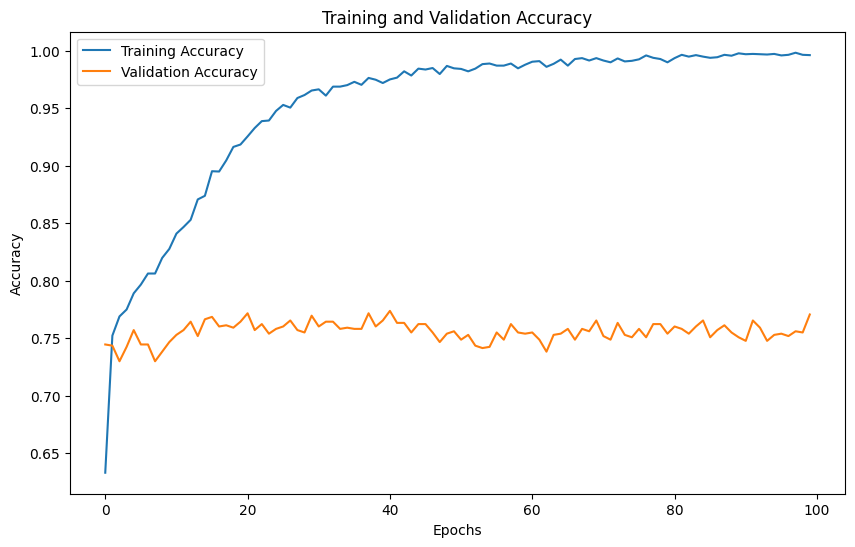

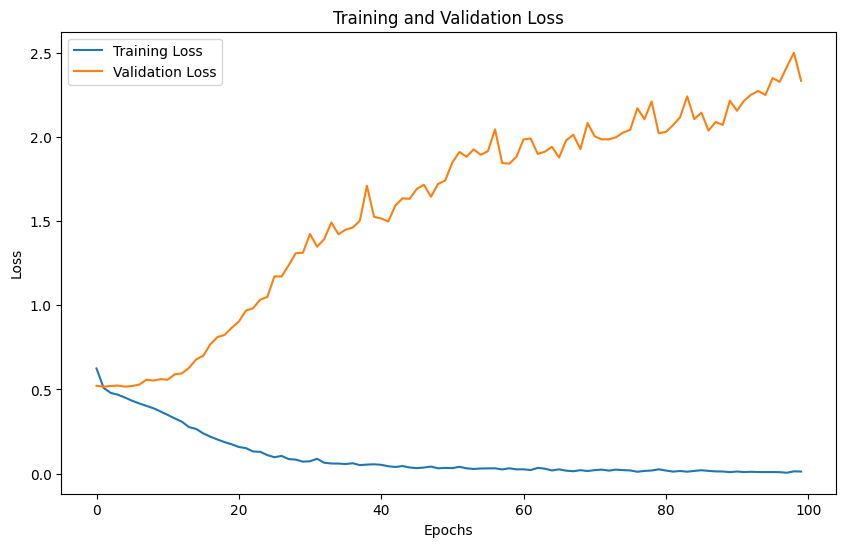

30/30 [==============================] - 0s 3ms/step


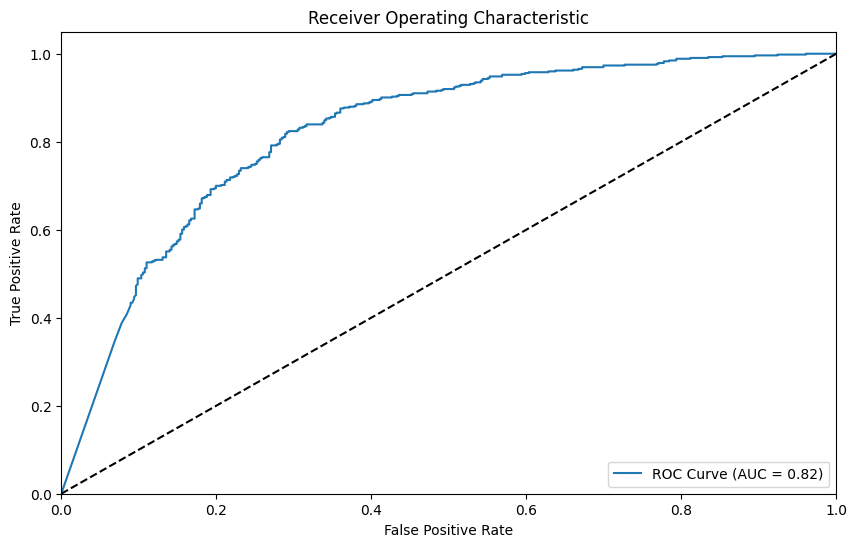

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot training loss and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Generate predictions
y_pred_prob = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

30/30 [==============================] - 0s 3ms/step


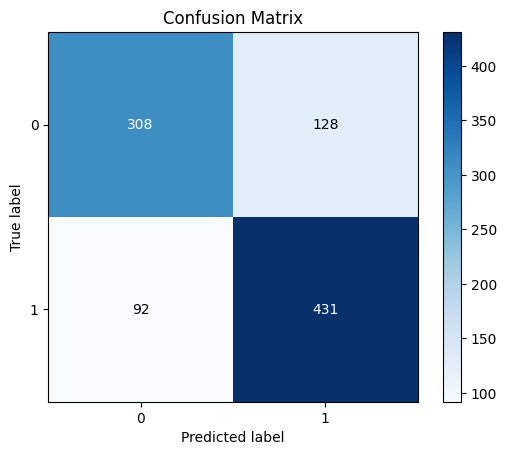

In [22]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Get the model's predictions on the test set
y_pred = model.predict(X_test)

# Convert the predictions to binary labels (0 or 1)
y_pred_labels = (y_pred > 0.5).astype(int).flatten()
skplt.metrics.plot_confusion_matrix(y_test, y_pred_labels, normalize=False, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()